In [16]:
import pandas as pd
import numpy as np
from gensim.models.fasttext import FastText
from gensim.models import Word2Vec
import gensim
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

In [17]:
# Membaca dataset
df = pd.read_csv("/kaggle/input/test13/dataset_josua_new.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22426 entries, 0 to 22425
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             22426 non-null  object
 1   final_sentiment  22426 non-null  int64 
 2   tokenize_text    22426 non-null  object
dtypes: int64(1), object(2)
memory usage: 525.7+ KB


# Word Embedding

In [18]:
model_skipgram = Word2Vec.load("/kaggle/input/test13/skipgram_wiki_word2vec_gensim3.model")

In [19]:
import ast
def convert_string_to_list(string_representation):
    try:
        return ast.literal_eval(string_representation)
    except (ValueError, SyntaxError):
        return string_representation # or handle the error as needed

# Ubah semua string menjadi bentuk list
df['text'] = df['text'].apply(convert_string_to_list)
df

,text,final_sentiment,tokenize_text
0,bikin pengin beli mcdonalds,0,"['bikin', 'pengin', 'beli', 'mcdonalds']"
1,orang post boikotin orang langsung influence o...,0,"['orang', 'post', 'boikotin', 'orang', 'langsu..."
2,bayang nih yaw support idol finansial yaw paka...,1,"['bayang', 'nih', 'yaw', 'support', 'idol', 'f..."
3,gerak boikot usaha franchise alam rugi,0,"['gerak', 'boikot', 'usaha', 'franchise', 'ala..."
4,beli ubah kentang kopi ayo tugas float boikot ...,0,"['beli', 'ubah', 'kentang', 'kopi', 'ayo', 'tu..."
...,...,...,...
22421,boikot mcdonaldsi kontraproduktif laku umkm su...,0,"['boikot', 'mcdonaldsi', 'kontraproduktif', 'l..."
22422,selamat laku industri konsumsi rusia aksi boik...,1,"['selamat', 'laku', 'industri', 'konsumsi', 'r..."
22423,mah orang tegur mcdonalds iya orang keliling b...,1,"['mah', 'orang', 'tegur', 'mcdonalds', 'iya', ..."
22424,tuju boikot kerja paruh tahan,0,"['tuju', 'boikot', 'kerja', 'paruh', 'tahan']"


In [20]:
# Ubah setiap token menjadi vector, kemudian mencari nilai rata-ratanya
def sent_vec(sent):
    vector_size = model_skipgram.wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in model_skipgram.wv:
            ctr += 1
            wv_res += model_skipgram.wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [21]:
df['vektor'] = df['text'].apply(sent_vec)
df

,text,final_sentiment,tokenize_text,vektor
0,bikin pengin beli mcdonalds,0,"['bikin', 'pengin', 'beli', 'mcdonalds']","[0.0001987978769466281, -0.0010106851282762363..."
1,orang post boikotin orang langsung influence o...,0,"['orang', 'post', 'boikotin', 'orang', 'langsu...","[-7.275602692971005e-05, -0.000202493909334104..."
2,bayang nih yaw support idol finansial yaw paka...,1,"['bayang', 'nih', 'yaw', 'support', 'idol', 'f...","[-9.822054044823595e-05, 0.0002452251238096745..."
3,gerak boikot usaha franchise alam rugi,0,"['gerak', 'boikot', 'usaha', 'franchise', 'ala...","[-5.4398806669804105e-05, 0.000259700214990195..."
4,beli ubah kentang kopi ayo tugas float boikot ...,0,"['beli', 'ubah', 'kentang', 'kopi', 'ayo', 'tu...","[3.0314802036931116e-05, 0.000100638290869713,..."
...,...,...,...,...
22421,boikot mcdonaldsi kontraproduktif laku umkm su...,0,"['boikot', 'mcdonaldsi', 'kontraproduktif', 'l...","[-6.093683281951413e-05, 9.314547980688893e-05..."
22422,selamat laku industri konsumsi rusia aksi boik...,1,"['selamat', 'laku', 'industri', 'konsumsi', 'r...","[-0.0003119002984111066, 0.0001423587523360788..."
22423,mah orang tegur mcdonalds iya orang keliling b...,1,"['mah', 'orang', 'tegur', 'mcdonalds', 'iya', ...","[0.00037569750847685484, -0.000512678580097628..."
22424,tuju boikot kerja paruh tahan,0,"['tuju', 'boikot', 'kerja', 'paruh', 'tahan']","[0.00017491491206993276, 0.0004804772045015572..."


# Membagi Dataset

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split

In [23]:
# Ubah X ke bentuk list
X = df["vektor"].tolist()

In [24]:
# Ubah y ke bentuk list
y = df["final_sentiment"].tolist()

In [26]:
# Membagi dataset training dan testing dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_original_train, X_original_test = train_test_split(df['text'].values, test_size=0.2, random_state=42)

In [27]:
print("Jumlah data X_train :", len(X_train))
print("Jumlah data X_test :", len(X_test))

Jumlah data X_train : 17940
Jumlah data X_test : 4486


In [13]:
print("Jumlah data y_train :", len(y_train))
print("Jumlah data y_test :", len(y_test))

Jumlah data y_train : 17940
Jumlah data y_test : 4486


In [14]:
value_counts = Counter(y_train)
for value, count in value_counts.items():
    print(f"{value}: {count} data")

1: 10176 data
0: 7764 data


In [15]:
value_counts = Counter(y_test)
for value, count in value_counts.items():
    print(f"{value}: {count} data")

1: 2544 data
0: 1942 data


# Implementasi

In [28]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

## Suport Vector Machine

Class distribution in y_train: Counter({1: 10176, 0: 7764})
Class distribution in y_test: Counter({1: 2544, 0: 1942})
Best Parameters for SVM: {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}
Average Cross-Validation Score for SVM: 0.7828316610925307
Accuracy for SVM: 0.7619259919750334
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      1942
           1       0.79      0.80      0.79      2544

    accuracy                           0.76      4486
   macro avg       0.76      0.76      0.76      4486
weighted avg       0.76      0.76      0.76      4486

Confusion Matrix for SVM:
 [[1389  553]
 [ 515 2029]]


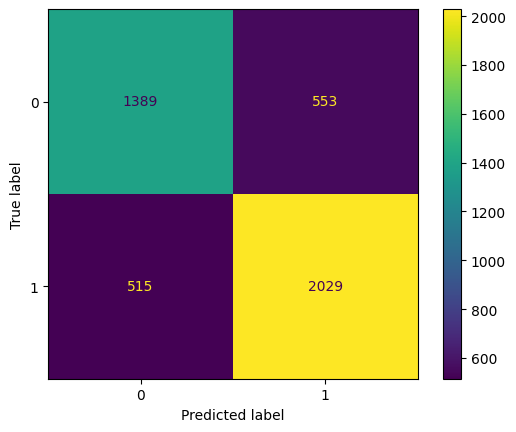

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter

# Inspect class distribution
print("Class distribution in y_train:", Counter(y_train))
print("Class distribution in y_test:", Counter(y_test))

# Normalisasi
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model SVM
svm_classifier = SVC()

# Tunning Parameter
param_grid_svm = {
    'C': [0.01],
    'kernel': ['linear'],
    'gamma': [0.1]
}

# GridSearch
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, y_train)

# Best parameters
best_params_svm = grid_search_svm.best_params_
cross_val_scores_svm = cross_val_score(grid_search_svm.best_estimator_, X_train_scaled, y_train, cv=5)
avg_cross_val_score_svm = cross_val_scores_svm.mean()

print("Best Parameters for SVM:", best_params_svm)
print("Average Cross-Validation Score for SVM:", avg_cross_val_score_svm)

# Retrain with best parameters and class_weight
svm_classifier = SVC(**best_params_svm, class_weight='balanced')
svm_classifier.fit(X_train_scaled, y_train)

# Evaluate
y_pred_svm = svm_classifier.predict(X_test_scaled)
accuracy_svm = svm_classifier.score(X_test_scaled, y_test)
print("Accuracy for SVM:", accuracy_svm)

# Updated classification report
classification_rep_svm = classification_report(y_test, y_pred_svm, zero_division=0)
print("Classification Report for SVM:\n", classification_rep_svm)

# Confusion matrix
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:\n", confusion_mat_svm)
ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test_scaled, y_test)

In [37]:
import pandas as pd
import numpy as np

def extract_misclassified_samples(X_test_scaled, y_test, trained_model, original_texts):
    """
    Extract misclassified samples from a trained model's test predictions
    
    Parameters:
    -----------
    X_test_scaled : array-like
        Scaled test features
    y_test : array-like
        True labels for test set
    trained_model : sklearn classifier
        Trained machine learning model
    original_texts : array-like
        Original text samples corresponding to X_test
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame containing misclassified samples
    """
    # Ensure inputs are numpy arrays
    X_test_scaled = np.asarray(X_test_scaled)
    y_test = np.asarray(y_test)
    original_texts = np.asarray(original_texts)
    
    # Predict on test set
    y_pred = trained_model.predict(X_test_scaled)
    
    # Find misclassified samples
    misclassified_mask = y_pred != y_test
    
    # Create DataFrame of misclassified samples
    misclassified_df = pd.DataFrame({
        'Original_Text': original_texts[misclassified_mask],
        'True_Label': y_test[misclassified_mask],
        'Predicted_Label': y_pred[misclassified_mask]
    })
    
    # Save to CSV
    misclassified_df.to_csv('misclassified_samples.csv', index=False)
    
    print(f"Total misclassified samples: {misclassified_df.shape[0]}")
    print("Misclassified samples saved to 'misclassified_samples.csv'")
    
    return misclassified_df

# Example usage:
# misclassified_samples = extract_misclassified_samples(
#     X_test_scaled, 
#     y_test, 
#     svm_classifier, 
#     X_original_test
# )

print("Script ready. Call extract_misclassified_samples() with your trained model and test data.")

Script ready. Call extract_misclassified_samples() with your trained model and test data.


In [38]:
misclassified_samples = extract_misclassified_samples(
    X_test_scaled, 
    y_test, 
    svm_classifier, 
    X_original_test
)

Total misclassified samples: 1068
Misclassified samples saved to 'misclassified_samples.csv'
